In [ ]:
# Importing Libraries

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import Counter

dataset_path = "/content/drive/MyDrive/final dermalscan dataset"

In [ ]:
# Inspecting Folder Structure

print("Dataset Structure:\n")
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/ ({len(files)} files)")
print("\n")

#  Counting Images per Class

class_counts = {}
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        class_counts[class_name] = len(os.listdir(class_dir))

print("Image count per class:")
for cls, count in class_counts.items():
    print(f"  {cls}: {count}")

Dataset Structure:

final dermalscan dataset/ (0 files)
    clear skin/ (300 files)
    wrinkles/ (300 files)
    puffy eyes/ (300 files)
    dark spots/ (300 files)


Image count per class:
  clear skin: 300
  wrinkles: 300
  puffy eyes: 300
  dark spots: 300


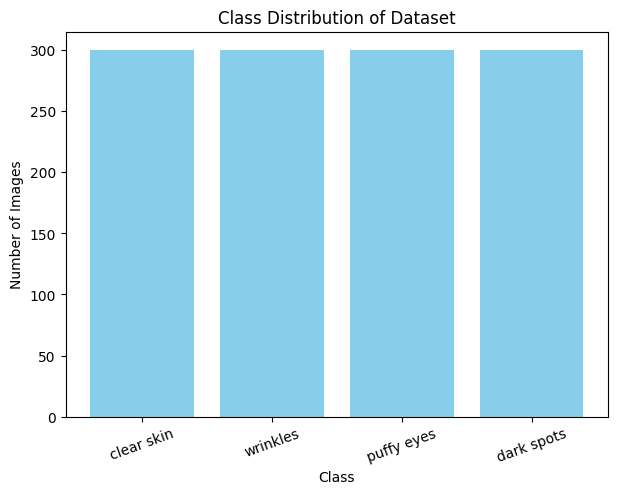

In [ ]:
# Visualization of Class Distribution

plt.figure(figsize=(7,5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Class Distribution of Dataset")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=20)
plt.show()

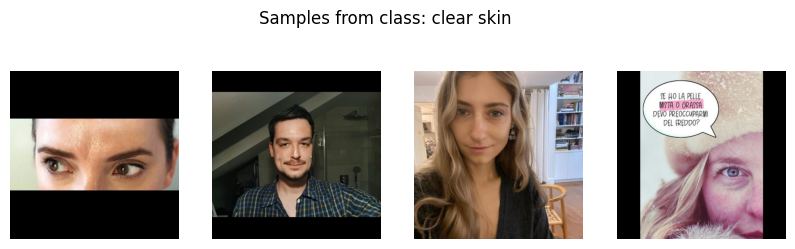

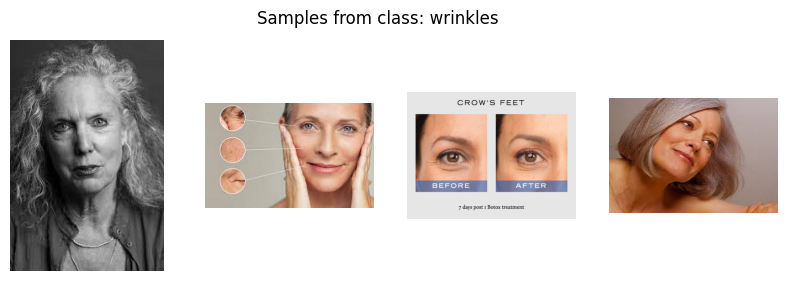

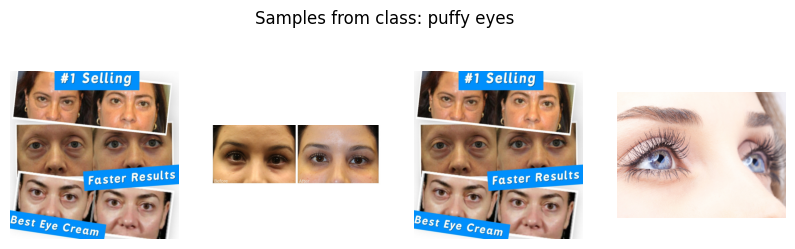

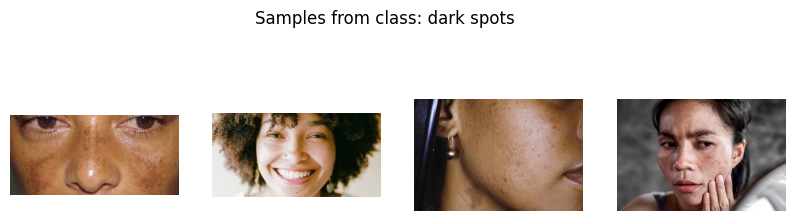

In [ ]:
# Display Few Sample Images

for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        sample_imgs = os.listdir(class_dir)[14:18]  # first 4 images
        plt.figure(figsize=(10, 3))
        plt.suptitle(f"Samples from class: {class_name}")
        for idx, img_name in enumerate(sample_imgs):
            img_path = os.path.join(class_dir, img_name)
            try:
                img = mpimg.imread(img_path)
                plt.subplot(1, 4, idx + 1)
                plt.imshow(img)
                plt.axis("off")
            except:
                pass
        plt.show()

In [ ]:
# backup
import shutil
import os

original_dataset = "/content/drive/MyDrive/final dermalscan dataset"
backup_dataset = "/content/drive/MyDrive/final dermalscan dataset backup"

# Created a backup (copy everything)
shutil.copytree(original_dataset, backup_dataset, dirs_exist_ok=True)
print(f"Backup created at: {backup_dataset}")

Backup created at: /content/drive/MyDrive/final dermalscan dataset backup


In [ ]:
#Image Standardization(resizing(224X224),Conversion to RGB,Normalization)

import os
import cv2
import numpy as np
from tqdm import tqdm


input_path = "/content/drive/MyDrive/final dermalscan dataset"
output_path="/content/drive/MyDrive/final dermalscan dataset output/standardization"
os.makedirs(output_path, exist_ok=True)


IMG_SIZE = 224  # Standard size (EfficientNetB0 compatible)

def standardize_image(img):

    # Convert to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize to standard size
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    # Normalize pixel intensity (contrast adjustment)
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

    return img


for cls in os.listdir(input_path):
    cls_path = os.path.join(input_path, cls)
    if not os.path.isdir(cls_path):
        continue

    out_cls = os.path.join(output_path, cls)
    os.makedirs(out_cls, exist_ok=True)

    print(f"\nStandardizing images in class '{cls}' ...")

    for img_name in tqdm(os.listdir(cls_path)):
        img_path = os.path.join(cls_path, img_name)
        img = cv2.imread(img_path)

        if img is None:
            continue

        standardized = standardize_image(img)

        # Saving standardized image
        save_path = os.path.join(out_cls, img_name)
        cv2.imwrite(save_path, cv2.cvtColor(standardized, cv2.COLOR_RGB2BGR))

print("\nImage Standardization Completed Successfully!")


Standardizing images in class 'clear skin' ...


100%|██████████| 300/300 [00:09<00:00, 30.52it/s]



Standardizing images in class 'wrinkles' ...


100%|██████████| 300/300 [00:09<00:00, 30.84it/s]



Standardizing images in class 'puffy eyes' ...


100%|██████████| 300/300 [00:09<00:00, 30.26it/s]



Standardizing images in class 'dark spots' ...


100%|██████████| 300/300 [00:09<00:00, 32.50it/s]


Image Standardization Completed Successfully!


In [1]:
import os
import shutil
import hashlib
from collections import defaultdict

# ================================
# 🔧 PATH SETUP
# ================================
# Original standardized dataset
original_dataset_path = "/content/drive/MyDrive/final dermalscan dataset output/standardization"

# Output directory for cleaned copy
output_dir = "/content/drive/MyDrive/final dermalscan dataset output/standardization_cleaned"

# ================================
# 📁 CREATE CLEAN COPY
# ================================
if not os.path.exists(output_dir):
    print("📂 Creating a copy of the dataset for cleaning...")
    shutil.copytree(original_dataset_path, output_dir)
else:
    print("✅ Output directory already exists. Cleaning will be done here:", output_dir)

# ================================
# 🧮 DUPLICATE REMOVAL PROCESS
# ================================
def compute_hash(image_path):
    """Compute MD5 hash for an image file."""
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

print("\n🔍 Starting duplicate detection and removal in:", output_dir)

for cls in os.listdir(output_dir):
    cls_path = os.path.join(output_dir, cls)
    if not os.path.isdir(cls_path):
        continue

    hash_dict = defaultdict(list)

    # Compute hashes
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        try:
            file_hash = compute_hash(img_path)
            hash_dict[file_hash].append(img_path)
        except Exception as e:
            print(f"⚠️ Skipping {img_name}: {e}")
            continue

    # Remove duplicates (keep only one)
    for paths in hash_dict.values():
        if len(paths) > 1:
            print(f"\n🧹 Removing duplicates in class '{cls}':")
            for dup_img in paths[1:]:
                print(f"   ❌ {dup_img}")
                os.remove(dup_img)

# ================================
# 📊 FINAL IMAGE COUNT
# ================================
print("\n✅ Duplicate removal complete!")
print("\n📸 Image count per class after cleaning:")
for cls in os.listdir(output_dir):
    cls_path = os.path.join(output_dir, cls)
    if os.path.isdir(cls_path):
        count = len([f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))])
        print(f"{cls}: {count} images")

print(f"\n🎯 Cleaned dataset saved at: {output_dir}")


📂 Creating a copy of the dataset for cleaning...

🔍 Starting duplicate detection and removal in: /content/drive/MyDrive/final dermalscan dataset output/standardization_cleaned

🧹 Removing duplicates in class 'wrinkles':
   ❌ /content/drive/MyDrive/final dermalscan dataset output/standardization_cleaned/wrinkles/141.jpg

🧹 Removing duplicates in class 'wrinkles':
   ❌ /content/drive/MyDrive/final dermalscan dataset output/standardization_cleaned/wrinkles/28.jpg
   ❌ /content/drive/MyDrive/final dermalscan dataset output/standardization_cleaned/wrinkles/150.jpg

🧹 Removing duplicates in class 'wrinkles':
   ❌ /content/drive/MyDrive/final dermalscan dataset output/standardization_cleaned/wrinkles/167.jpg

🧹 Removing duplicates in class 'wrinkles':
   ❌ /content/drive/MyDrive/final dermalscan dataset output/standardization_cleaned/wrinkles/Image_290.jpg

🧹 Removing duplicates in class 'wrinkles':
   ❌ /content/drive/MyDrive/final dermalscan dataset output/standardization_cleaned/wrinkles/8

In [5]:
# Data Augmentation
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img
from shutil import copy2


dataset_path = "/content/drive/MyDrive/final dermalscan dataset output/standardization_cleaned"
augmented_path = "/content/drive/MyDrive/final dermalscan dataset output/augmented"
os.makedirs(augmented_path, exist_ok=True)

# Targeting number of images per class
target_count = 300

# Defining augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

for cls in os.listdir(dataset_path):
    cls_path = os.path.join(dataset_path, cls)
    if not os.path.isdir(cls_path):
        continue

    output_cls_path = os.path.join(augmented_path, cls)
    os.makedirs(output_cls_path, exist_ok=True)

    # Getting all images in the class
    images = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))]
    if len(images) == 0:
        print(f" No images found in class '{cls}', skipping augmentation.")
        continue

    # Copying original images first
    for img_name in images:
        src_path = os.path.join(cls_path, img_name)
        dst_path = os.path.join(output_cls_path, img_name)
        if not os.path.exists(dst_path):
            copy2(src_path, dst_path)

    # Augmenting images until reaching target_count
    current_count = len(os.listdir(output_cls_path))
    i = 0
    while current_count < target_count:
        img_name = images[i % len(images)]
        img_path = os.path.join(cls_path, img_name)

        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generating one augmented image at a time
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_cls_path,
                                  save_prefix='aug', save_format='jpg'):
            current_count += 1
            break

        i += 1

# Final summary
print("\nData augmentation complete. Final image count per class:")
for cls in os.listdir(augmented_path):
    cls_path = os.path.join(augmented_path, cls)
    if os.path.isdir(cls_path):
        count = len([f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))])
        print(f"{cls}: {count} images")





Data augmentation complete. Final image count per class:
clear skin: 300 images
wrinkles: 300 images
puffy eyes: 300 images
dark spots: 300 images


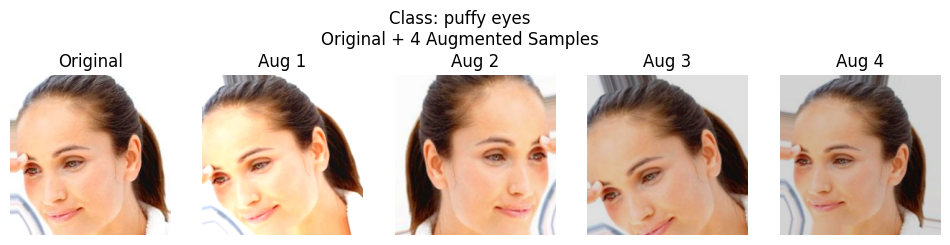

In [6]:
#Visualization of data Augmentation

import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Picking a random class from augmented dataset
cls = random.choice(os.listdir(augmented_path))
cls_path = os.path.join(augmented_path, cls)

# Picking a random image from that class
img_name = random.choice([f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))])
img_path = os.path.join(cls_path, img_name)

# Loading image and convert to NumPy array
img = load_img(img_path)
img_array = img_to_array(img)

# Ploting original image
plt.figure(figsize=(12, 3))
plt.subplot(1, 5, 1)
plt.imshow(img_array.astype('uint8'))
plt.axis('off')
plt.title("Original")

# Generate and plot 4 augmented images
i = 2
for batch in datagen.flow(img_array.reshape((1,) + img_array.shape), batch_size=1):
    plt.subplot(1, 5, i)
    plt.imshow(batch[0].astype('uint8'))
    plt.axis('off')
    plt.title(f"Aug {i-1}")
    i += 1
    if i > 5:
        break

plt.suptitle(f"Class: {cls}\nOriginal + 4 Augmented Samples")
plt.show()


In [7]:
# one Hot Encoding
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to my final preprocessed dataset (feature enhanced)
dataset_path = "/content/drive/MyDrive/final dermalscan dataset output/augmented"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32


datagen = ImageDataGenerator()

dataset = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)


images, labels = next(dataset)

print(" One-hot encoded dataset ready!")
print("Images tensor shape:", images.shape)
print("Labels tensor shape:", labels.shape)
print("Example one-hot vector:", labels[0])
print("Class mapping:", dataset.class_indices)

Found 1200 images belonging to 4 classes.
 One-hot encoded dataset ready!
Images tensor shape: (32, 224, 224, 3)
Labels tensor shape: (32, 4)
Example one-hot vector: [0. 1. 0. 0.]
Class mapping: {'clear skin': 0, 'dark spots': 1, 'puffy eyes': 2, 'wrinkles': 3}
